In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
#load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check shape
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
#preprocessing
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [4]:
#Model A – Neural Network with ReLU
model_relu = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_relu.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_relu = model_relu.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8636 - loss: 0.4828 - val_accuracy: 0.9578 - val_loss: 0.1507
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9616 - loss: 0.1382 - val_accuracy: 0.9652 - val_loss: 0.1155
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9742 - loss: 0.0902 - val_accuracy: 0.9693 - val_loss: 0.1027
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9801 - loss: 0.0667 - val_accuracy: 0.9699 - val_loss: 0.1060
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9852 - loss: 0.0507 - val_accuracy: 0.9727 - val_loss: 0.0944
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9884 - loss: 0.0386 - val_accuracy: 0.9730 - val_loss: 0.0933
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9911 - loss: 0.0312 - val_accuracy: 0.9735 - val_loss: 0.0932
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9937 - loss: 0.0241 - 

In [5]:
#Model B – Neural Network with Sigmoid
model_sigmoid = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_sigmoid.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_sigmoid = model_sigmoid.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8311 - loss: 0.7044 - val_accuracy: 0.9308 - val_loss: 0.2427
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9348 - loss: 0.2295 - val_accuracy: 0.9477 - val_loss: 0.1850
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9526 - loss: 0.1664 - val_accuracy: 0.9568 - val_loss: 0.1519
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9619 - loss: 0.1364 - val_accuracy: 0.9612 - val_loss: 0.1328
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9708 - loss: 0.1073 - val_accuracy: 0.9658 - val_loss: 0.1213
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9749 - loss: 0.0893 - val_accuracy: 0.9682 - val_loss: 0.1106
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9818 - loss: 0.0696 - val_accuracy: 0.9711 - val_loss: 0.1012
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9839 - loss: 0.0609 - 

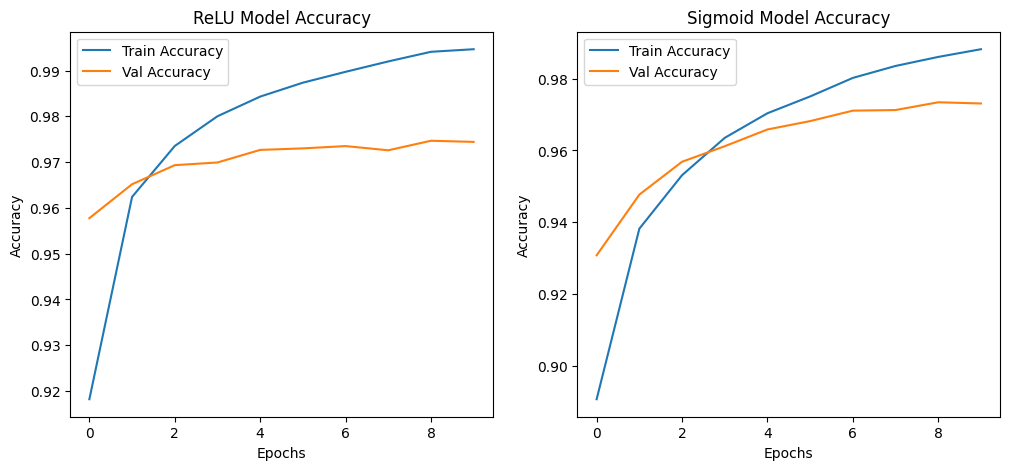

In [6]:
#Plot Accuracy Curves
plt.figure(figsize=(12,5))

# ReLU Accuracy
plt.subplot(1,2,1)
plt.plot(history_relu.history['accuracy'], label='Train Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='Val Accuracy')
plt.title('ReLU Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Sigmoid Accuracy
plt.subplot(1,2,2)
plt.plot(history_sigmoid.history['accuracy'], label='Train Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Val Accuracy')
plt.title('Sigmoid Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

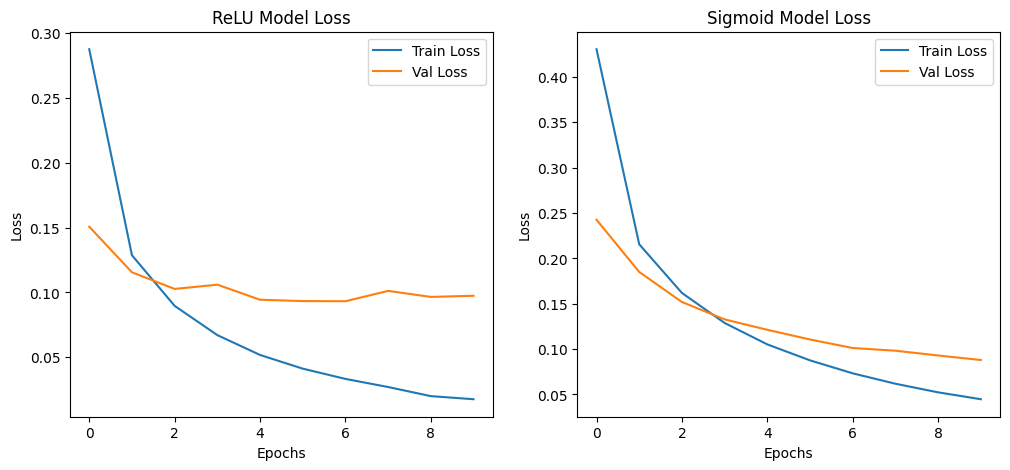

In [7]:
#Plot Loss Curves
plt.figure(figsize=(12,5))

# ReLU Loss
plt.subplot(1,2,1)
plt.plot(history_relu.history['loss'], label='Train Loss')
plt.plot(history_relu.history['val_loss'], label='Val Loss')
plt.title('ReLU Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Sigmoid Loss
plt.subplot(1,2,2)
plt.plot(history_sigmoid.history['loss'], label='Train Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Val Loss')
plt.title('Sigmoid Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [8]:
#Evaluate Models on Test Data
relu_test_loss, relu_test_acc = model_relu.evaluate(X_test, y_test_cat)
sigmoid_test_loss, sigmoid_test_acc = model_sigmoid.evaluate(X_test, y_test_cat)

print("ReLU Test Accuracy:", relu_test_acc)
print("Sigmoid Test Accuracy:", sigmoid_test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0893
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9702 - loss: 0.0979
ReLU Test Accuracy: 0.978600025177002
Sigmoid Test Accuracy: 0.973800003528595


# **Summary: Simple Neural Network for MNIST Digit Classification**

In this project, a simple feed-forward neural network was developed to classify handwritten digits from the MNIST dataset. The dataset contains **70,000 images of digits (0–9)**, with **60,000 training images** and **10,000 testing images.** Each image was normalized and labels were one-hot encoded for multi-class classification.

Two models were trained using different activation functions in the hidden layer:

**Model A (ReLU)** – Rectified Linear Unit

**Model B (Sigmoid)** – S-shaped activation function

Both models were compiled using the Adam optimizer and categorical_crossentropy loss, and trained for multiple epochs. Training and validation accuracy and loss were monitored.

**🔹 Results**

**ReLU Model achieved 97.86% test accuracy**

**Sigmoid Model achieved 97.38% test accuracy**

Accuracy and loss curves showed that ReLU converged faster and handled strong signals more effectively, while Sigmoid was slightly slower.

**🔹 Conclusion**

Both activation functions worked well for MNIST, but ReLU performed slightly better in terms of accuracy and convergence speed. This demonstrates why ReLU is commonly preferred in modern neural networks for image classification tasks.